In [4]:
import numpy as np 
import pandas as pd 

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving day_approach_maskedID_timeseries.csv to day_approach_maskedID_timeseries.csv


In [5]:
df_day = pd.read_csv('day_approach_maskedID_timeseries.csv')

In [6]:
df_day.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [7]:
df_day.shape

(42766, 73)

In [ ]:
#Convert nr sessions to int.
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

All the variables seem to be either in float or int format. This looks goods and no change is required.

In [ ]:
df_day.isnull().sum()

nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64

0    42183
1      583
Name: injury, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


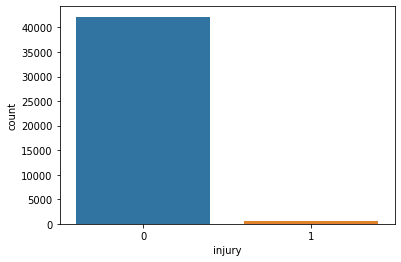

In [8]:
import seaborn as sns
print(df_day['injury'].value_counts())
sns.countplot(df_day['injury'])

In our entire dataset, there are a total of 42183 times when an athlete didn't got injured, and 583 times when an athlete got injured.

In [9]:
df_day.drop(['Athlete ID', 'Date'], axis=1, inplace=True)

In [11]:
df_day['injury'] = df_day['injury'].astype('category')

In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   nr. sessions                 42766 non-null  float64 
 1   total km                     42766 non-null  float64 
 2   km Z3-4                      42766 non-null  float64 
 3   km Z5-T1-T2                  42766 non-null  float64 
 4   km sprinting                 42766 non-null  float64 
 5   strength training            42766 non-null  float64 
 6   hours alternative            42766 non-null  float64 
 7   perceived exertion           42766 non-null  float64 
 8   perceived trainingSuccess    42766 non-null  float64 
 9   perceived recovery           42766 non-null  float64 
 10  nr. sessions.1               42766 non-null  float64 
 11  total km.1                   42766 non-null  float64 
 12  km Z3-4.1                    42766 non-null  float64 
 13  k

In [14]:
#baseline model

In [15]:
# Split dataset into a training and testing set.
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df_day.drop(['injury'] , axis=1) , df_day['injury'] , test_size=0.3, random_state=2)

In [16]:
X_train.shape, X_test.shape

((29936, 70), (12830, 70))

In [17]:
#RE-SAMPLING THE TRAINING DATA
# Balance the distribution of classes in the target variable with an oversampling of minority classes.
from imblearn.over_sampling import RandomOverSampler

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

ros = RandomOverSampler (random_state=2)
X_train, y_train = ros.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )

Number of observations in the target variable before oversampling of the minority class: [29523   413]

Number of observations in the target variable after oversampling of the minority class: [29523 29523]


In [18]:
#FEATURE SCALING (STANDARDIZATION)
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

In [19]:
#FEATURE SCALING (NORMALIZATION)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform ( X_train )
X_test_norm = scaler.transform ( X_test )

#MODELLING

##BASELINE MODEL WITH LOGISTIC REGRESSION

In [35]:
#RAW
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression()
base_model.fit(X_train,y_train)

print(f1_score(y_test,base_model.predict(X_test), average='weighted'))

0.7676199104068688


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [33]:
#STANDARDIZED
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression()
base_model.fit(X_train_std,y_train)

print(f1_score(y_test,base_model.predict(X_test_std), average='weighted'))

0.7704617189541463


In [34]:
#NORMALIZED
from sklearn.linear_model import LogisticRegression
base_model = LogisticRegression()
base_model.fit(X_train_norm,y_train)

print(f1_score(y_test,base_model.predict(X_test_norm), average='weighted'))

0.7685057340873905


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#RANDOM FOREST CLASSIFIER

In [21]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



#MODELLING USING WITH RAW DATA

In [27]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train,y_train)

print(f1_score(y_test,rfc.predict(X_test), average='weighted'))

0.8923913378697189


#MODELLING USING NORMALIZED SET

In [28]:
rfc1 = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc1.fit(X_train_norm,y_train)

print(f1_score(y_test,rfc1.predict(X_test_norm), average='weighted'))

0.8924379584036343


#MODELLING USING STANDARDIZED SET

---



In [29]:
rfc2 = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc2.fit(X_train_std,y_train)

print(f1_score(y_test,rfc2.predict(X_test_std), average='weighted'))

0.8923913378697189
